<div style="border-blue: 15px; border-style: solid; border-color:turquoise;background-color:salmon; padding: 15pt">

 # Simulador Cuantico 
   <b>*Alison  Geraldine  Valderrama  Munar*<b>
     </div>


In [12]:
from qiskit import QuantumRegister, QuantumCircuit
from qiskit import Aer, execute
from qiskit.visualization import plot_histogram
import numpy as np

### 1  Circuito a simular y elementos constantes ###

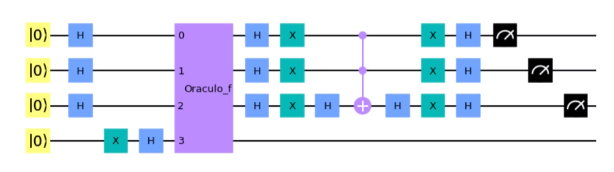

<div style="border-blue: 15px; border-style: solid; border-color:salmon;background-color:pink; padding: 15pt">

 # PUNTO 1 -CADENA GANADORA 011
  


In [15]:
import numpy as np

KET_0 = np.array([
    [1],
    [0]
])

H = 1/np.sqrt(2) * np.array([
    [1, 1],
    [1, -1]
])

X = np.array([
    [0, 1],
    [1, 0]
])

I = np.array([
    [1, 0],
    [0, 1]
])

### 2.1 Vector de estado inicial ###

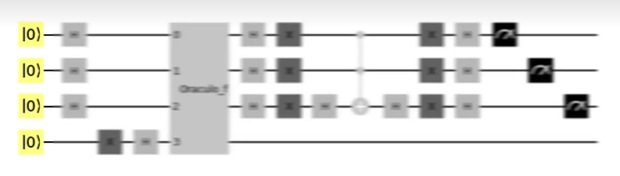

In [16]:
vector_estado_inicial = np.kron( np.kron(KET_0, KET_1), np.kron(KET_1, KET_0))
print(vector_estado_inicial)

[[1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]]


### 2.2 Columna de Hadamard ###

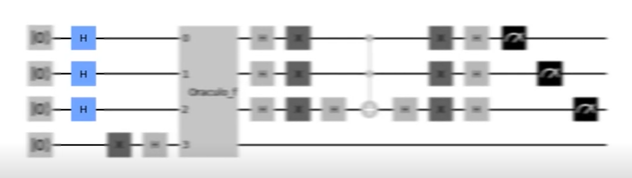

In [17]:
columna_hadamard = np.kron( np.kron(H, H), np.kron(H,I))
print((columna_hadamard))

m1 = columna_hadamard

[[ 0.35355339  0.          0.35355339  0.          0.35355339  0.
   0.35355339  0.          0.35355339  0.          0.35355339  0.
   0.35355339  0.          0.35355339  0.        ]
 [ 0.          0.35355339  0.          0.35355339  0.          0.35355339
   0.          0.35355339  0.          0.35355339  0.          0.35355339
   0.          0.35355339  0.          0.35355339]
 [ 0.35355339  0.         -0.35355339 -0.          0.35355339  0.
  -0.35355339 -0.          0.35355339  0.         -0.35355339 -0.
   0.35355339  0.         -0.35355339 -0.        ]
 [ 0.          0.35355339 -0.         -0.35355339  0.          0.35355339
  -0.         -0.35355339  0.          0.35355339 -0.         -0.35355339
   0.          0.35355339 -0.         -0.35355339]
 [ 0.35355339  0.          0.35355339  0.         -0.35355339 -0.
  -0.35355339 -0.          0.35355339  0.          0.35355339  0.
  -0.35355339 -0.         -0.35355339 -0.        ]
 [ 0.          0.35355339  0.          0.35355339 -0.

### 2.3 Inversion de fase ### 

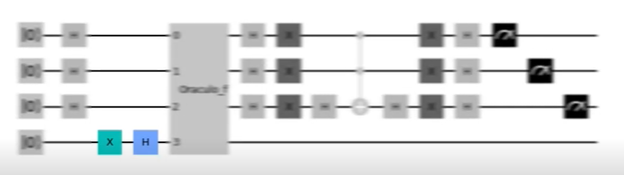

In [18]:
matriz_inv_fase = np.kron ( np.kron(I,I), np.kron(I, H@X))
print(matriz_inv_fase)
m2 = matriz_inv_fase

[[ 0.70710678  0.70710678  0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.        ]
 [-0.70710678  0.70710678 -0.          0.         -0.          0.
  -0.          0.         -0.          0.         -0.          0.
  -0.          0.         -0.          0.        ]
 [ 0.          0.          0.70710678  0.70710678  0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.        ]
 [-0.          0.         -0.70710678  0.70710678 -0.          0.
  -0.          0.         -0.          0.         -0.          0.
  -0.          0.         -0.          0.        ]
 [ 0.          0.          0.          0.          0.70710678  0.70710678
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.        ]
 [-0.          0.         -0.          0.         -0.70710678  0.70710678
  -

### 2.4 Matriz Oraculo

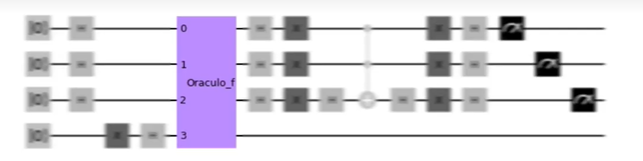

In [19]:
matriz_orac = np.eye(16)
matriz_orac[6][6] = 0
matriz_orac[7][7] = 0
matriz_orac[6][7] = 1
matriz_orac[7][6] = 1

matriz_orac[14][14] = 0
matriz_orac[15][15] = 0
matriz_orac[14][15] = 1
matriz_orac[15][14] = 1

print(matriz_orac)
m3 = matriz_orac

[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]]


### 2.5 Columana de Hadamard

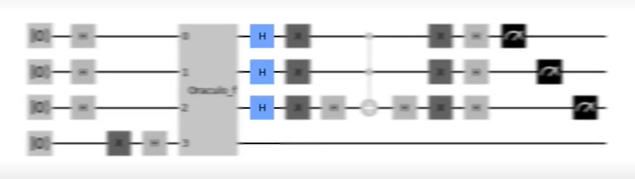

In [20]:
columna_hadamard
m4 = columna_hadamard 

### 2.6 Reflixión

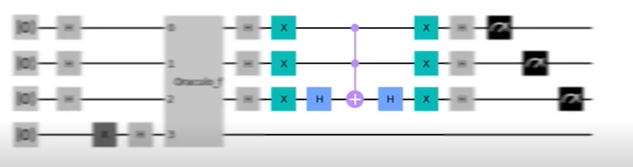

In [21]:
matriz_reflexion = np.eye(8)
matriz_reflexion [0][0] = -1
matriz_reflexion = np.kron(matriz_reflexion, I)
print(matriz_reflexion)
m5 = matriz_reflexion

[[-1. -0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [-0. -1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1. 

### 2.7 Columna de Hadamard

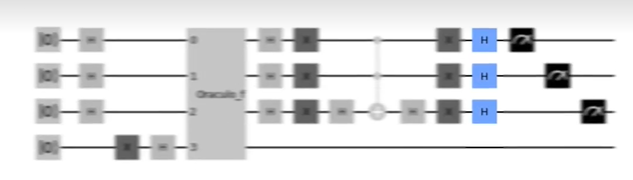

In [22]:
 m6 = columna_hadamard

### 3 Matriz consilidada del circuito 

In [25]:
matriz_total = m6 @ m5 @ m4 @ m3 @ m2 @ m1

print(matriz_total)

[[-3.64559186e-17 -2.50000000e-01 -3.98719144e-17  2.50000000e-01
  -3.98719144e-17  2.50000000e-01  5.00000000e-01  2.50000000e-01
   2.50000000e-01  2.50000000e-01  2.50000000e-01  2.50000000e-01
   2.50000000e-01  2.50000000e-01  2.50000000e-01  2.50000000e-01]
 [ 3.64559186e-17 -2.50000000e-01  3.98719144e-17  2.50000000e-01
   3.98719144e-17  2.50000000e-01 -5.00000000e-01  2.50000000e-01
  -2.50000000e-01  2.50000000e-01 -2.50000000e-01  2.50000000e-01
  -2.50000000e-01  2.50000000e-01 -2.50000000e-01  2.50000000e-01]
 [-3.64559186e-17 -2.50000000e-01 -5.00000000e-01 -2.50000000e-01
  -3.98719144e-17  2.50000000e-01  1.21163388e-17 -2.50000000e-01
   2.50000000e-01  2.50000000e-01 -2.50000000e-01 -2.50000000e-01
   2.50000000e-01  2.50000000e-01 -2.50000000e-01 -2.50000000e-01]
 [ 3.64559186e-17 -2.50000000e-01  5.00000000e-01 -2.50000000e-01
   3.98719144e-17  2.50000000e-01 -1.21163388e-17 -2.50000000e-01
  -2.50000000e-01  2.50000000e-01  2.50000000e-01 -2.50000000e-01
  -2.50

### 4 Vector de estado final

In [26]:
vector_estado_final = matriz_total @ vector_estado_inicial

print(vector_estado_final)

[[-3.64559186e-17]
 [ 3.64559186e-17]
 [-3.64559186e-17]
 [ 3.64559186e-17]
 [-3.64559186e-17]
 [ 3.64559186e-17]
 [-5.00000000e-01]
 [ 5.00000000e-01]
 [-4.33948125e-17]
 [ 4.33948125e-17]
 [-4.33948125e-17]
 [ 4.33948125e-17]
 [-3.64559186e-17]
 [ 3.64559186e-17]
 [-5.00000000e-01]
 [ 5.00000000e-01]]


### 5 Calculo del vector de probabilidades 

In [27]:
vector_probabilidades = np.abs(vector_estado_final)**2

print(vector_probabilidades)

[[1.32903400e-33]
 [1.32903400e-33]
 [1.32903400e-33]
 [1.32903400e-33]
 [1.32903400e-33]
 [1.32903400e-33]
 [2.50000000e-01]
 [2.50000000e-01]
 [1.88310975e-33]
 [1.88310975e-33]
 [1.88310975e-33]
 [1.88310975e-33]
 [1.32903400e-33]
 [1.32903400e-33]
 [2.50000000e-01]
 [2.50000000e-01]]


### 6 (Pseudo) Simulador aleatoria de 1 o varios shots

In [28]:
shots=1000

import random

resultados = random.choices(["0000", "0001", "0010", "0011", "0101", "0100", "0111", "0110", "1000", "1001", "1010", "1011", "1100", "1101", "1110", "1111"], vector_probabilidades, k=shots)

resultados_finales = [resultado[:-1] for resultado in resultados]
print(resultados_finales)

['111', '011', '111', '011', '011', '111', '011', '111', '111', '111', '111', '011', '111', '011', '011', '011', '011', '011', '111', '011', '011', '011', '111', '011', '011', '111', '011', '111', '011', '111', '011', '111', '111', '111', '111', '011', '111', '011', '011', '011', '011', '111', '011', '011', '111', '011', '011', '111', '011', '111', '111', '011', '111', '011', '011', '111', '111', '011', '111', '011', '011', '111', '011', '011', '011', '111', '111', '111', '011', '111', '111', '111', '011', '011', '111', '011', '111', '111', '111', '111', '111', '111', '111', '111', '011', '111', '111', '011', '111', '111', '011', '011', '011', '111', '111', '111', '111', '111', '111', '011', '011', '111', '011', '011', '011', '111', '111', '011', '111', '011', '111', '011', '111', '111', '111', '011', '011', '111', '011', '111', '111', '011', '011', '111', '111', '011', '011', '011', '111', '011', '111', '011', '111', '011', '011', '111', '111', '111', '111', '111', '111', '011', '011'

### 7 Creación y puerta a punto del diccionario de conteos 

In [29]:
from collections import Counter

conteos = Counter(resultados_finales)

print(conteos)

Counter({'111': 513, '011': 487})


### 8 Graficación del histograma

In [30]:
import matplotlib.pyplot as plt

<BarContainer object of 2 artists>

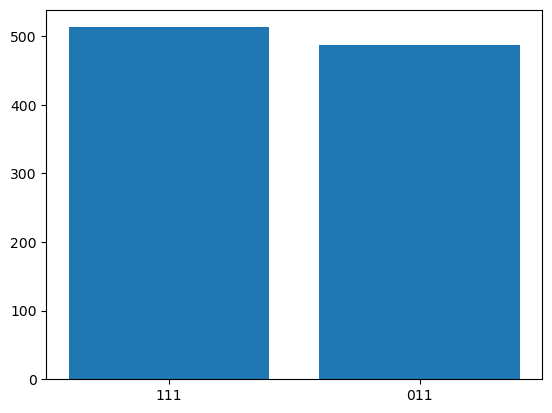

In [31]:
plt.bar(conteos.keys(), conteos.values())

In [32]:
lista_keys = sorted(conteos.keys())
lista_values = [np.round(conteos[etiqueta]/shots, 2) for etiqueta in lista_keys]

<BarContainer object of 2 artists>

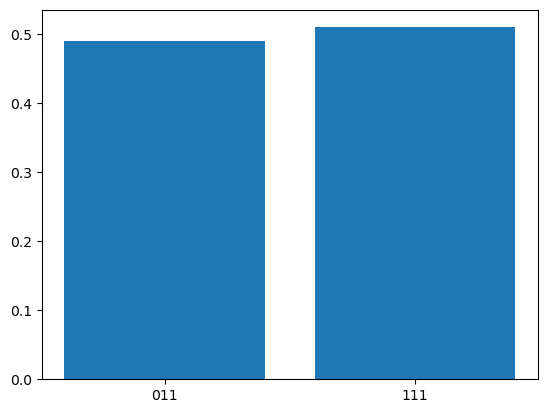

In [33]:
plt.bar(lista_keys, lista_values)

<BarContainer object of 2 artists>

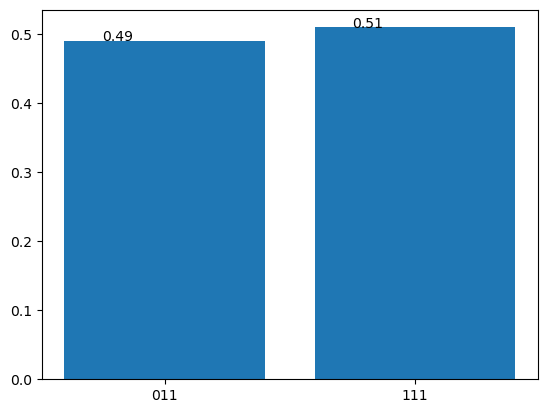

In [34]:
fig, ax = plt.subplots()
for i, v in enumerate(lista_values):
    ax.text(i-0.25, v, str(v))
ax.bar(lista_keys, lista_values)

<p style="background-color:salmon; color:white; padding: 18px"> Podemos ver que nos dan dos cadenas ganadoras la que estamos buscando  $|011\rangle$) y otra que es la $|111\rangle$) podemos modificar el oraculo para que solo nos de como resultado $|011\rangle$), negando la cadena $|111\rangle$).

<div style="border-blue: 15px; border-style: solid; border-color:salmon;background-color:pink; padding: 15pt">

 # PUNTO 4 - Deutsh-Jozsa
  


### Circuito de DEUTSCH JOZSA ###

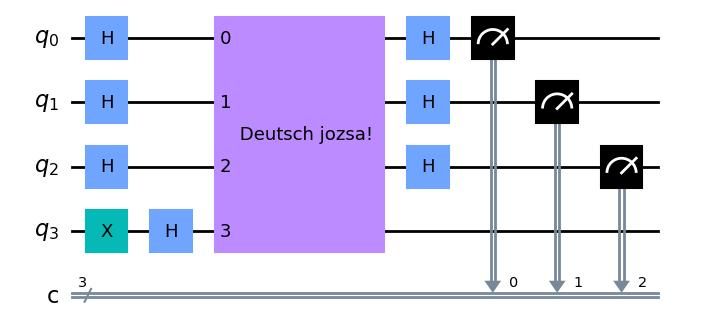

In [37]:
vector_estado_inicial = np.kron(np.kron(KET_0, KET_0), KET_0)
print(vector_estado_inicial)

[[1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]]


In [56]:
columna_hadamard1 = np.kron(np.kron(H, H), H)
print(columna_hadamard)

m1=columna_hadamard1

[[ 0.35355339  0.          0.35355339  0.          0.35355339  0.
   0.35355339  0.          0.35355339  0.          0.35355339  0.
   0.35355339  0.          0.35355339  0.        ]
 [ 0.          0.35355339  0.          0.35355339  0.          0.35355339
   0.          0.35355339  0.          0.35355339  0.          0.35355339
   0.          0.35355339  0.          0.35355339]
 [ 0.35355339  0.         -0.35355339 -0.          0.35355339  0.
  -0.35355339 -0.          0.35355339  0.         -0.35355339 -0.
   0.35355339  0.         -0.35355339 -0.        ]
 [ 0.          0.35355339 -0.         -0.35355339  0.          0.35355339
  -0.         -0.35355339  0.          0.35355339 -0.         -0.35355339
   0.          0.35355339 -0.         -0.35355339]
 [ 0.35355339  0.          0.35355339  0.         -0.35355339 -0.
  -0.35355339 -0.          0.35355339  0.          0.35355339  0.
  -0.35355339 -0.         -0.35355339 -0.        ]
 [ 0.          0.35355339  0.          0.35355339 -0.

In [57]:
matriz_inv_fase1 = np.kron(I, np.kron(I, H@X))
print(matriz_inv_fase1)
m2 = matriz_inv_fase1

[[ 0.70710678  0.70710678  0.          0.          0.          0.
   0.          0.        ]
 [-0.70710678  0.70710678 -0.          0.         -0.          0.
  -0.          0.        ]
 [ 0.          0.          0.70710678  0.70710678  0.          0.
   0.          0.        ]
 [-0.          0.         -0.70710678  0.70710678 -0.          0.
  -0.          0.        ]
 [ 0.          0.          0.          0.          0.70710678  0.70710678
   0.          0.        ]
 [-0.          0.         -0.          0.         -0.70710678  0.70710678
  -0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.
   0.70710678  0.70710678]
 [-0.          0.         -0.          0.         -0.          0.
  -0.70710678  0.70710678]]


In [58]:
matriz_orac = np.eye(8)
matriz_orac[1][1] = 0
matriz_orac[0][0] = 0
matriz_orac[0][1] = 1
matriz_orac[1][0] = 1

matriz_orac[5][5] = 0
matriz_orac[4][4] = 0
matriz_orac[4][5] = 1
matriz_orac[5][4] = 1

m3 = matriz_orac
print(m3)

[[0. 1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1.]]


In [59]:
m4 = columna_hadamard1

In [60]:
matriz_total = m4 @ m3 @ m2 @ m1 
print(matriz_total)

[[ 7.07106781e-01 -7.07106781e-01  3.36731597e-18 -3.36731597e-18
   3.36731597e-18 -3.36731597e-18 -3.36731597e-18  3.36731597e-18]
 [-3.25730279e-18 -3.47732915e-18 -7.07106781e-01 -7.07106781e-01
   3.25730279e-18  3.47732915e-18 -3.25730279e-18 -3.47732915e-18]
 [ 3.36731597e-18 -3.36731597e-18  7.07106781e-01 -7.07106781e-01
  -3.36731597e-18  3.36731597e-18  3.36731597e-18 -3.36731597e-18]
 [-7.07106781e-01 -7.07106781e-01 -3.25730279e-18 -3.47732915e-18
  -3.25730279e-18 -3.47732915e-18  3.25730279e-18  3.47732915e-18]
 [ 3.36731597e-18 -3.36731597e-18 -3.36731597e-18  3.36731597e-18
   7.07106781e-01 -7.07106781e-01  3.36731597e-18 -3.36731597e-18]
 [ 3.25730279e-18  3.47732915e-18 -3.25730279e-18 -3.47732915e-18
  -3.25730279e-18 -3.47732915e-18 -7.07106781e-01 -7.07106781e-01]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  7.07106781e-01 -7.07106781e-01]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  -

In [43]:
vector_estado_final = matriz_total @ vector_estado_inicial
print(vector_estado_final)

[[ 7.07106781e-01]
 [-3.25730279e-18]
 [ 3.36731597e-18]
 [-7.07106781e-01]
 [ 3.36731597e-18]
 [ 3.25730279e-18]
 [ 0.00000000e+00]
 [ 0.00000000e+00]]


In [44]:
vector_probabilidades = np.abs(vector_estado_final)**2
print(vector_probabilidades)

[[5.00000000e-01]
 [1.06100215e-35]
 [1.13388168e-35]
 [5.00000000e-01]
 [1.13388168e-35]
 [1.06100215e-35]
 [0.00000000e+00]
 [0.00000000e+00]]


In [50]:
resultados = random.choices(['000', '001', '010', '011',
                             '100','101','110','111'], 
                             vector_probabilidades, k=shots)

resultados_finales = [resultado[:-1] for resultado in resultados]

In [49]:
from collections import Counter

conteos = Counter(resultados_finales)

print(conteos)

Counter({'00': 525, '01': 475})


### Grafica  ###

<BarContainer object of 2 artists>

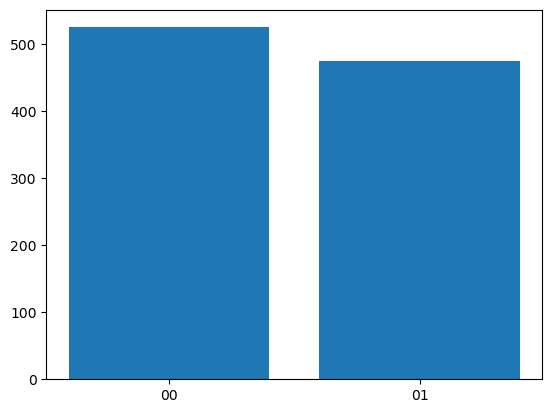

In [61]:
plt.bar(conteos.keys(), conteos.values())

In [63]:
resultados = random.choices(['000', '001', '010', '100',
                             '011','101','110','111'], 
                             vector_probabilidades, k=1)

resultados_finales = [resultado[:-1] for resultado in resultados]


In [64]:
conteos = Counter(resultados_finales)
print(conteos)


Counter({'00': 1})


<BarContainer object of 1 artists>

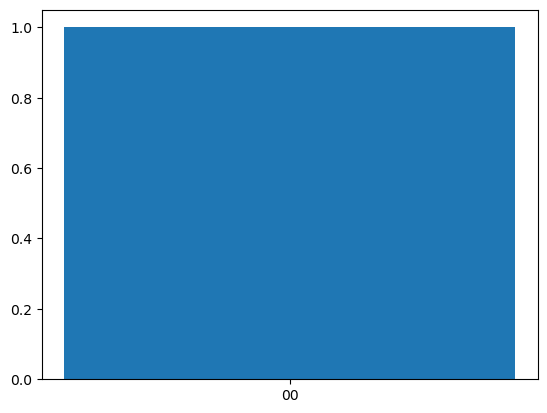

In [65]:
plt.bar(conteos.keys(), conteos.values())

<p style="background-color:salmon; color:white; padding: 18px"> Podemos ver que la diferencia entre 1000 shots y 1 shot.
    
 > La de 1000 shots nos arroga como resultado dos cadenas posibles $|00\rangle$) y $|01\rangle$)
 

 > La de 1 shot nos arroga una de esas dos cadenas que seria la $|00\rangle$) que por ende quedaria como la cadena ganadora